In [109]:
from __future__ import print_function
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython
import librosa
import librosa.display
import soundfile as sf

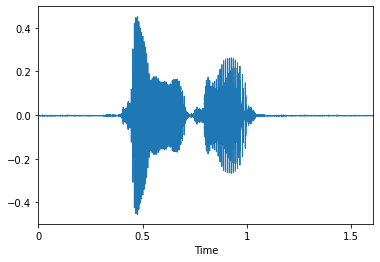

In [110]:
audio_path = "sound/konnichiha.wav"

# y,sr = librosa.load(path, sr=22050>0, mono=True or False, offset=0.0, duration=None, 
#                       dtype=<class 'numpy.float32'>, res_type='kaiser_best')
# sr = 16000
y, sr = librosa.load(audio_path, sr=sr, mono=True)

librosa.display.waveplot(y, sr=sr)
IPython.display.Audio(data=y,rate=sr)

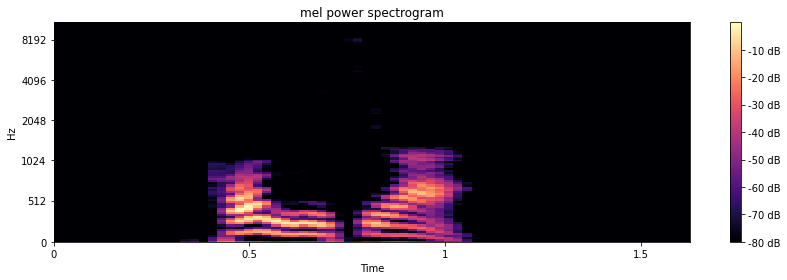

In [111]:
# メル周波係数
Smel = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
# デシベル変換
log_Smel = librosa.amplitude_to_db(Smel, ref=np.max)
# ーーーー　plot start　ーーーー
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_Smel, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()
# ーーーー　plot end　ーーーー

(1025, 70)


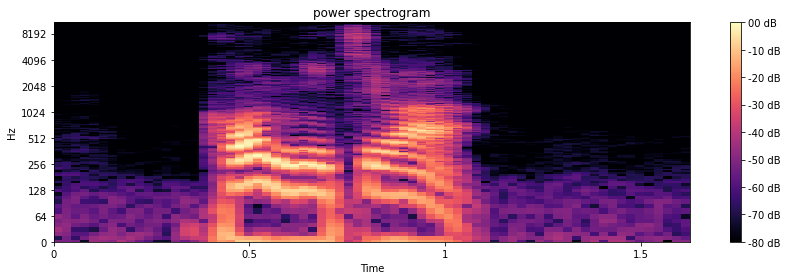

In [112]:
# 短時間フーリエ変換
n_fft = 2048
hop_length = 512
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
# デシベル変換
log_S = librosa.amplitude_to_db(S, ref=np.max)
# ーーーー　plot start　ーーーー
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='log')
plt.title('power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()
# ーーーー　plot end　ーーーー
print(log_S.shape)

(35391,)
(70,)


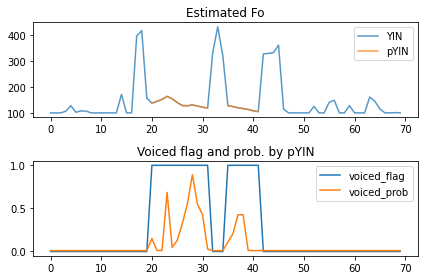

In [119]:
fmin, fmax = 100, 520
# Fundamental frequency (F0) estimation using the YIN algorithm.
fo_yin = librosa.yin(y, fmin, fmax)
# Fundamental frequency (F0) estimation using probabilistic YIN (pYIN).
fo_pyin, voiced_flag, voiced_prob = librosa.pyin(y, fmin, fmax)
# ーーーー　plot start　ーーーー
plt.subplot(2,1,1)
plt.plot(fo_yin,  label="YIN",  alpha=0.75)
plt.plot(fo_pyin, label="pYIN", alpha=0.75) 
plt.legend(loc='upper right')
plt.title("Estimated Fo")

plt.subplot(2,1,2)
plt.plot(voiced_flag, label="voiced_flag")
plt.plot(voiced_prob, label="voiced_prob")
plt.title("Voiced flag and prob. by pYIN")
plt.legend(loc='upper right')

plt.tight_layout()
# ーーーー　plot end　ーーーー
print(y.shape)
print(voiced_flag.shape)

In [114]:
# Write out audio as 24bit PCM WAV
data = 
samplerate = sr
sf.write('sound/test.wav', data, samplerate, subtype='PCM_24')

SyntaxError: invalid syntax (<ipython-input-114-1734fc54818a>, line 2)